In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [4]:
df_index = pd.read_csv("economic_index.csv")

In [5]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [7]:
#  Drop unnecessary columns
df_index.drop(columns=["Unnamed: 0","year","month"],axis = 1,inplace = True)

In [9]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [11]:
#  chekc null values
df_index.isnull().sum()



interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [12]:
#  Lests do some visulization 
import seaborn as sns

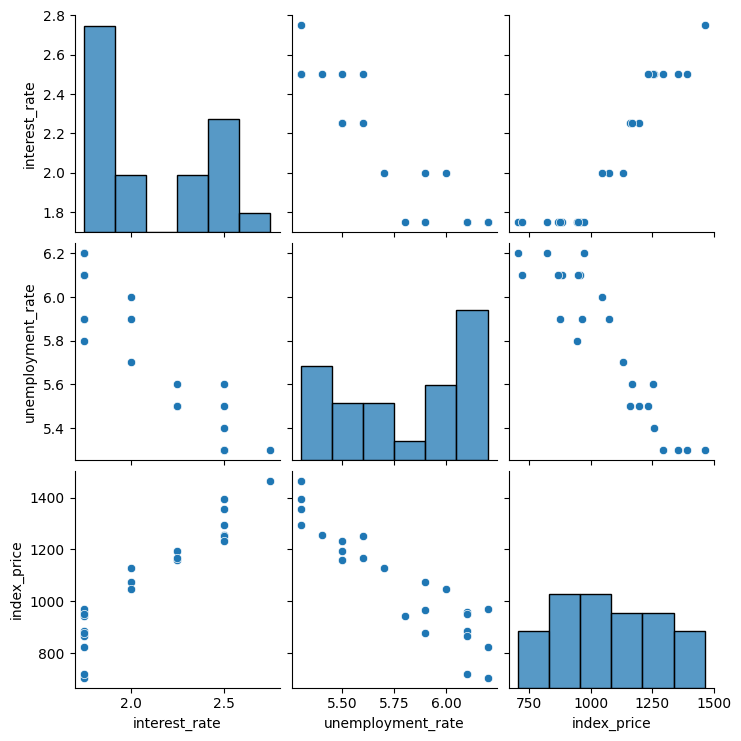

In [13]:
sns.pairplot(df_index)

In [14]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment rate')

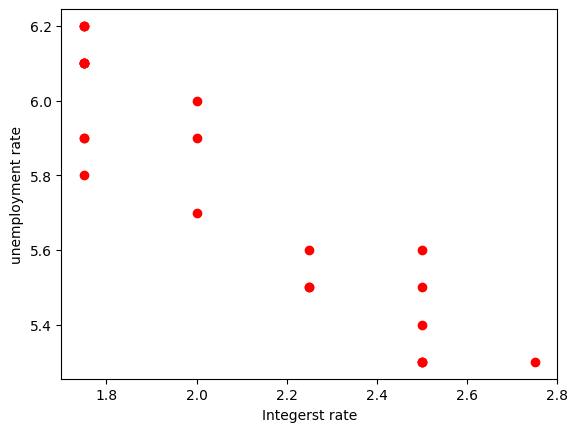

In [17]:
#  visualize the data points more closely
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color = 'r')
plt.xlabel("Integerst rate")
plt.ylabel("unemployment rate")


In [18]:
# indepedent and dependent features
X = df_index.iloc[:,:-1]
y = df_index.iloc[:,-1]

In [19]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [20]:
#  train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

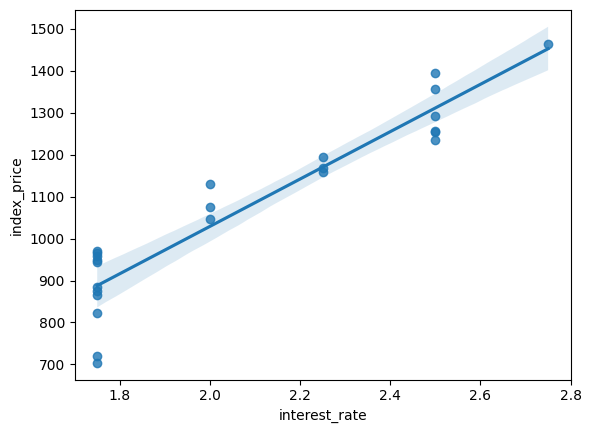

In [25]:
sns.regplot(x=df_index['interest_rate'], y=df_index['index_price'])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

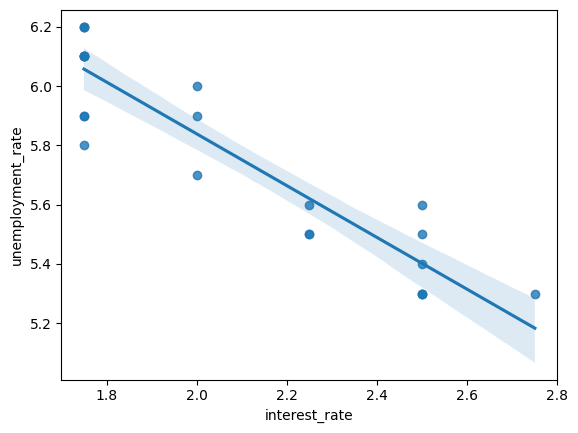

In [26]:
sns.regplot(x=df_index['interest_rate'], y=df_index['unemployment_rate'])

<Axes: xlabel='index_price', ylabel='index_price'>

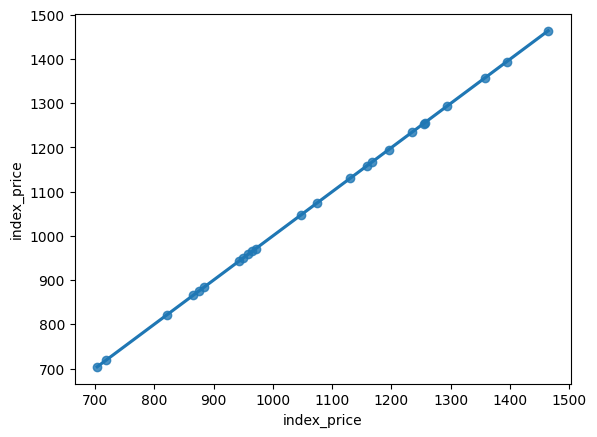

In [27]:
sns.regplot(x=df_index['index_price'], y=df_index['index_price'])

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [30]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [31]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [32]:
regression.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [34]:
#  cross validation

from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression,X_train,y_train,scoring = 'neg_mean_squared_error',cv = 3)

In [37]:
np.mean(validation_score)

-5914.82818016239

In [39]:
#  prediction 
y_pred = regression.predict(X_test)

In [40]:
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [42]:
#  Performance Metrices
from sklearn.metrics import  mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

8108.567426306604
73.80444932337097
90.04758423359621


In [44]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print(score)

0.7591371539010257


In [45]:
# display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.5985619231683761

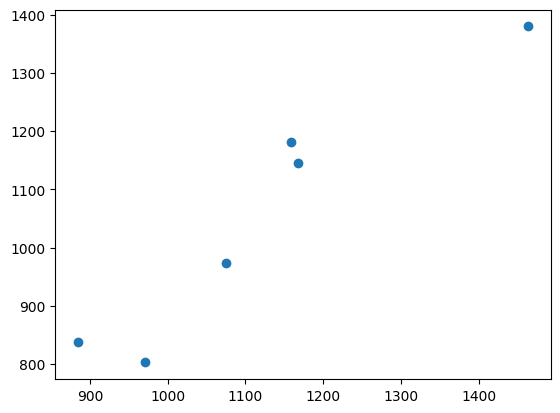

In [46]:
### Assumations
plt.scatter(y_test,y_pred)

In [48]:
residuals = y_test-y_pred
residuals

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64

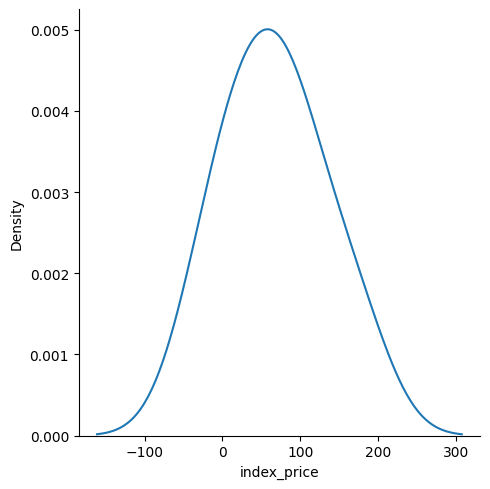

In [49]:
# Plot this residuals
sns.displot(residuals,kind = 'kde')

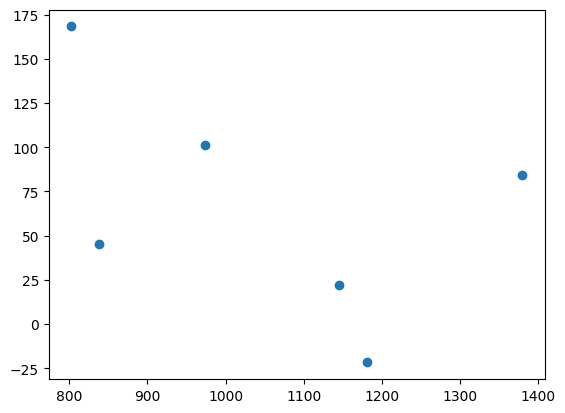

In [50]:
# Scatter plot with respect to prediction and residuals 
plt.scatter(y_pred,residuals)

In [51]:
#  OLS Linear Regression
import statsmodels.api as sm

In [52]:
model = sm.OLS(y_train,X_train).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Thu, 18 Dec 2025   Prob (F-statistic):                       0.754
Time:                        22:09:20   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [54]:
print(regression.coef_)

[  88.27275507 -116.25716066]
